# Árboles de decisión II
## author: Virginia Ordoño Bernier
## date: february 2024

En este ejercicio se aplican un modelos de **RANDOM FOREST** al dataset Iris (clasificación):

### 1. Gestión de datos

#### 1.1 Carga y creación del dataframe

In [2]:
import pandas as pd
import inflection
from sklearn.datasets import load_iris  # Importa load_iris desde sklearn.datasets

# Cargar el conjunto de datos de ejemplo (Iris)
iris = load_iris()
X = iris.data
y = iris.target

# Convertir los datos en DataFrame y cambiar nombre columnas
df_iris = pd.DataFrame(data=X, columns=iris.feature_names)
df_iris.columns = [inflection.underscore(col.replace(' ', '_').replace('(', '').replace(')', '')) for col in df_iris.columns]

# Agrega target
df_iris['target'] = y

df_iris



,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 1.2. Correlación de variables

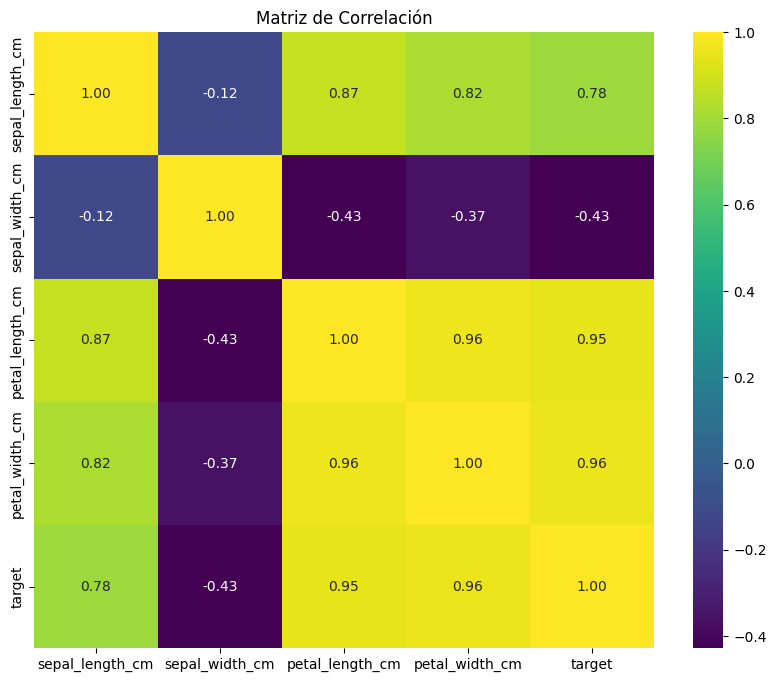

                 sepal_length_cm  sepal_width_cm  petal_length_cm  \
sepal_length_cm             1.00           -0.12             0.87   
sepal_width_cm             -0.12            1.00            -0.43   
petal_length_cm             0.87           -0.43             1.00   
petal_width_cm              0.82           -0.37             0.96   
target                      0.78           -0.43             0.95   

                 petal_width_cm  target  
sepal_length_cm            0.82    0.78  
sepal_width_cm            -0.37   -0.43  
petal_length_cm            0.96    0.95  
petal_width_cm             1.00    0.96  
target                     0.96    1.00  


In [3]:
# Crear una matriz de correlación
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_iris.corr()

# Visualizar la matriz de correlación utilizando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Imprimir la matriz de correlación con redondeo a 2 decimales
# print("Matriz de Correlación:")
print(correlation_matrix.round(2))

## 1.4. Lectura de correlación

Correlación Positiva Fuerte:

La longitud del pétalo (petal_length_cm) muestra una correlación positiva fuerte con la longitud del sépalo (sepal_length_cm) y el ancho del pétalo (petal_width_cm).

El ancho del pétalo (petal_width_cm) también muestra una fuerte correlación positiva con la longitud del pétalo (petal_length_cm) y la longitud del sépalo (sepal_length_cm).
Correlación Negativa Moderada:

La anchura del sépalo (sepal_width_cm) muestra una correlación negativa moderada con la longitud del pétalo (petal_length_cm) y el ancho del pétalo (petal_width_cm).
Correlación con la Variable Objetivo (target):

Todas las características (sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm) muestran una correlación positiva con la variable objetivo (target), siendo la mayor correlación la de petal_width_cm con un valor de 0.96.

### 1.5. Preparación de datos para el entrenamiento

In [4]:
from sklearn.model_selection import train_test_split

X = df_iris.drop('target', axis=1)
y = df_iris['target']

# Divide el DataFrame en conjuntos de entrenamiento y prueba 
train, test = train_test_split(df_iris, test_size=0.33, random_state=42)

# Reseteo de índices
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

# Separación características y etiquetas
X_train = train.drop('target', axis=1)  
y_train = train['target']  
X_test = test.drop('target', axis=1)  
y_test = test['target']

print("Conjunto de entrenamiento:")
print(X_train.head()) 

print("\nConjunto de prueba:")
print(X_test.head())  


Conjunto de entrenamiento:
   sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
0              5.7             2.9              4.2             1.3
1              7.6             3.0              6.6             2.1
2              5.6             3.0              4.5             1.5
3              5.1             3.5              1.4             0.2
4              7.7             2.8              6.7             2.0

Conjunto de prueba:
   sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
0              6.1             2.8              4.7             1.2
1              5.7             3.8              1.7             0.3
2              7.7             2.6              6.9             2.3
3              6.0             2.9              4.5             1.5
4              6.8             2.8              4.8             1.4


## MODELO: RANDOM FOREST (CLASIFICACIÓN)

### Validación cruzada

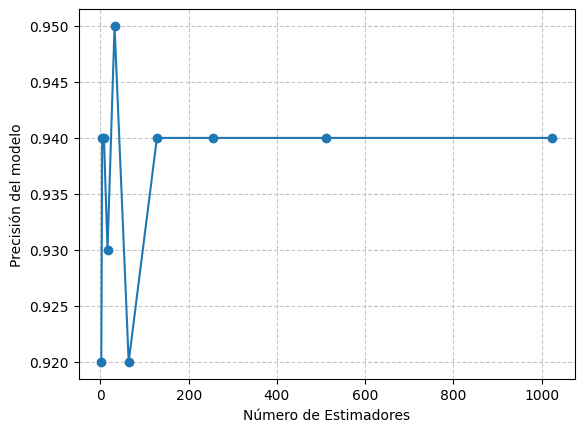

Mejor precisión: 0.9500. Mejor número de estimadores: 32


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

cv = KFold(n_splits=10, shuffle=False)

l_estimators = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

accuracies_list = list()
max_attributes = len(list(train))

# Inicializar las variables best_accuracy y best_depth antes del bucle
best_accuracy = 0

for estimators in l_estimators:
    fold_accuracy = []
    model = RandomForestClassifier(criterion='entropy', n_estimators=estimators)

    for train_fold, test_fold in cv.split(train):
        f_train = train.loc[train_fold]
        f_test = train.loc[test_fold]

        model = model.fit(
            X=f_train.drop(['target'], axis=1),
            y=f_train['target']
        )
        test_acc = model.score(
            X=f_test.drop(['target'], axis=1),
            y=f_test['target'])
        fold_accuracy.append(test_acc)

    avg = sum(fold_accuracy) / len(fold_accuracy)
    accuracies_list.append(avg)
    
    # Actualizar la mejor precisión y número de estimadores
    if avg > best_accuracy:
        best_accuracy = avg

plt.grid(True, linestyle='--', alpha=0.7)       
plt.plot(l_estimators, accuracies_list, marker='o')
plt.xlabel('Número de Estimadores')
plt.ylabel('Precisión del modelo')
plt.show()

best_est = l_estimators[np.argmax(accuracies_list)]
print(f"Mejor precisión: {best_accuracy:.4f}. Mejor estimador: {best_est}")


## Construcción del modelo con el mejor parámetro de profundidad

In [16]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Construcción del modelo
model =  RandomForestClassifier(n_estimators=best_est, criterion='entropy', random_state=0)

# Ajuste del modelo
model.fit( X = train.drop(['target'], axis=1), y = train['target'])

# Predicción dle modelo
y_pred = model.predict(X = test.drop(['target'], axis = 1))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## Visualización de la predicción

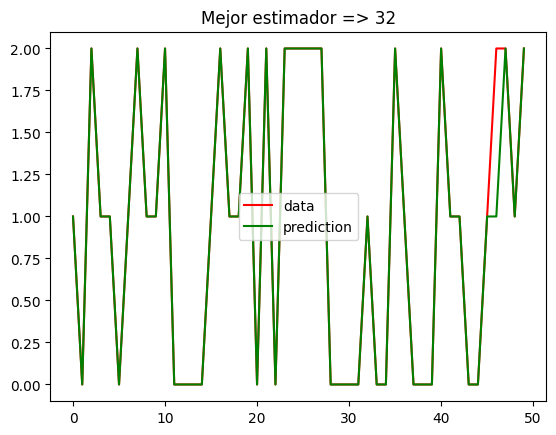

In [18]:
from sklearn.metrics import mean_absolute_error
import numpy as np

xx = np.stack([i for i in range(test['target'].shape[0])])
plt.plot(xx, test['target'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title(f"Mejor estimador => {best_est}")
plt.show()

## Importancia de las variables

Informe de Importancia de las Variables:
   Características  Importancia
3   petal_width_cm          1.0
0  sepal_length_cm          0.0
1   sepal_width_cm          0.0
2  petal_length_cm          0.0


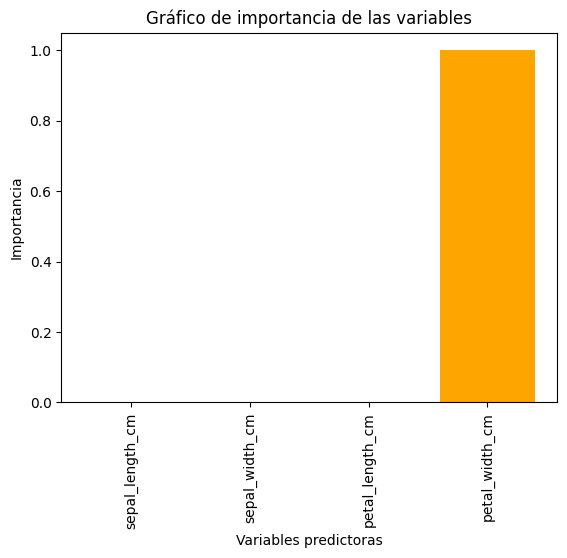

In [7]:
features_names = df_iris.columns[:-1].tolist() # Todos la última

# Cargamos la importancia de las características
importances = model.feature_importances_

# Create dataframe
feature_importance_df = pd.DataFrame({'Características':features_names, 'Importancia': importances})

# Order by importance
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Mostramos
print("Informe de Importancia de las Variables:")
print(feature_importance_df)

# Gráfico de importancia de las variables
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.bar(features_names, importances, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Variables predictoras')
plt.ylabel('Importancia')
plt.title('Gráfico de importancia de las variables')
plt.show()